In [1]:
from autolens.profiles import mass_profiles
from autolens.profiles import light_profiles
from autolens.galaxy import galaxy
from autolens.imaging import mask
from autolens.plotting import profile_plotters
from autolens.plotting import galaxy_plotters

# In this example, we'll use 'mass_profiles' and 'light_profiles' modules introduced previously, along with the 
# 'galaxy' modules to create Galaxy objects in PyAutoLens. We'll see that:

# 1) Galaxies can take multiple light-profiles and therefore be composed of multiple compnents.
# 2) Galaxies can take multiple mass-profiles which each contribute to a deflection angle map.

In [2]:
# Lets use an identical grid to the previous example.
image_grids = mask.ImagingGrids.from_shape_and_pixel_scale(shape=(100, 100), pixel_scale=0.05, 
                                                                 sub_grid_size=2)

In [3]:
# We make our source galaxy in the same way, passing it the same Sersic light profile again.
sersic_light_profile = light_profiles.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0,
                                                       intensity=1.0, effective_radius=1.0, sersic_index=2.5)
galaxy_with_light_profile = galaxy.Galaxy(light=sersic_light_profile)
# We can print the galaxy to confirm its profile and their parameters
print(galaxy_with_light_profile)

Redshift: None
Light Profiles:
EllipticalSersic
centre: (0.0, 0.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In [4]:
# In the previous example, we passed grids to the light-profile module to compute its image. 
# We can pass grids to galaxies, in exactly the same way, to compute the galaxy's image. 
galaxy_intensities = galaxy_with_light_profile.intensities_from_grid(grid=image_grids.image)
print('intensity of image-pixel 1:')
print(galaxy_intensities[0])
print('intensity of image-pixel 2:')
print(galaxy_intensities[1])
print('intensity of image-pixel 3:')
print(galaxy_intensities[2])
print('etc.')

intensity of image-pixel 1:
0.033686436269567265
intensity of image-pixel 2:
0.03480146593360767
intensity of image-pixel 3:
0.0359526695947356
etc.


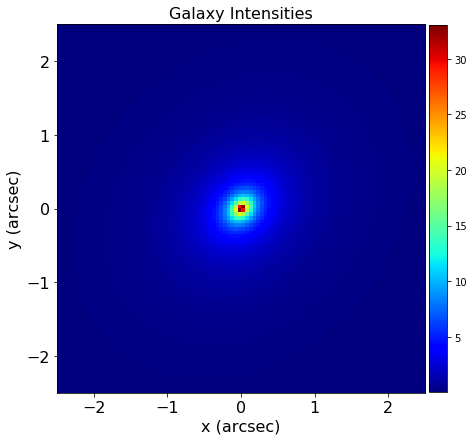

In [5]:
# We can plot the intensities using a galaxy plotter.
galaxy_plotters.plot_intensities(galaxy=galaxy_with_light_profile, grid=image_grids.image)

In [6]:
# The neat thing about galaxies, is we can pass them multiple profiles. Lets create a 
# galaxy with three light profiles.
light_profile_1 = light_profiles.SphericalSersic(centre=(0.0,  0.0), intensity=1.0, effective_radius=1.0, sersic_index=2.5)
light_profile_2 = light_profiles.SphericalSersic(centre=(1.0,  1.0), intensity=1.0, effective_radius=2.0, sersic_index=3.0)
light_profile_3 = light_profiles.SphericalSersic(centre=(1.0, -1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0)
galaxy_with_3_light_profiles = galaxy.Galaxy(light_1=light_profile_1, light_2=light_profile_2, light_3=light_profile_3)

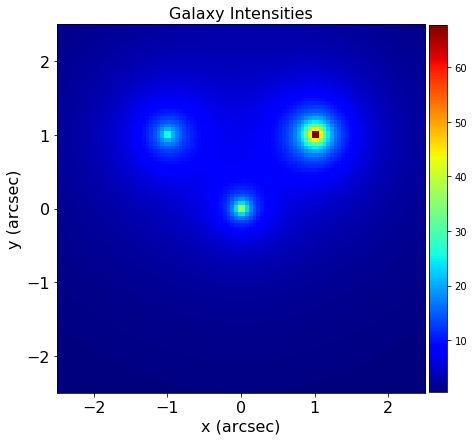

In [7]:
# If we plot the galaxy, we indeed see 3 blobs of light
galaxy_plotters.plot_intensities(galaxy=galaxy_with_3_light_profiles, grid=image_grids.image)

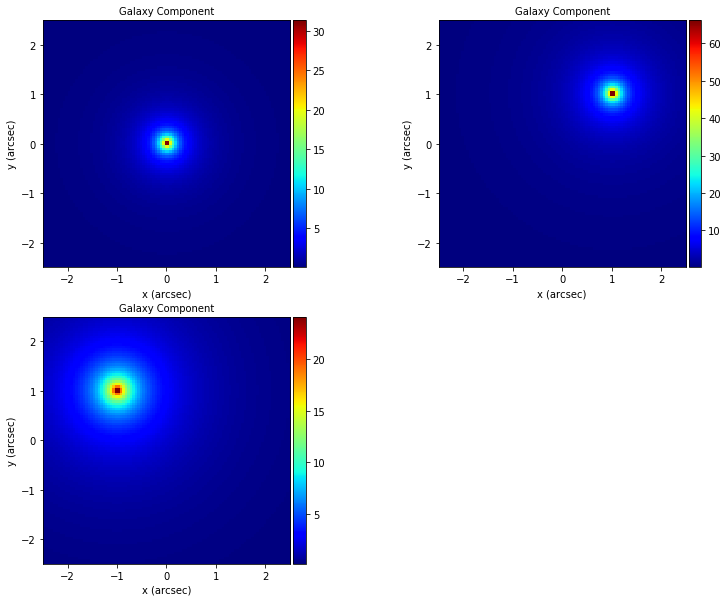

In [8]:
# We can also plot each individual light profile using the galaxy plotter's subplot method
galaxy_plotters.plot_intensities_subplot(galaxy=galaxy_with_3_light_profiles, grid=image_grids.image)

In [9]:
# We can play the exact same game with mass profiles. Lets create a galaxy with three 
# SIS mass profiles. 
mass_profile_1 = mass_profiles.SphericalIsothermal(centre=(0.0,  0.0), einstein_radius=1.0)
mass_profile_2 = mass_profiles.SphericalIsothermal(centre=(1.0,  1.0), einstein_radius=1.0)
mass_profile_3 = mass_profiles.SphericalIsothermal(centre=(1.0, -1.0), einstein_radius=1.0)
galaxy_with_3_mass_profiles = galaxy.Galaxy(mass_1=mass_profile_1, mass_2=mass_profile_2, mass_3=mass_profile_3)
# We can print a galaxy to confirm it possesses the sis mass-profiles above.
print(galaxy_with_3_mass_profiles)

Redshift: None
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, 1.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, -1.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0


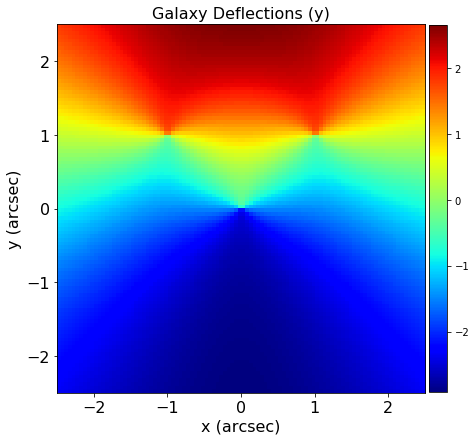

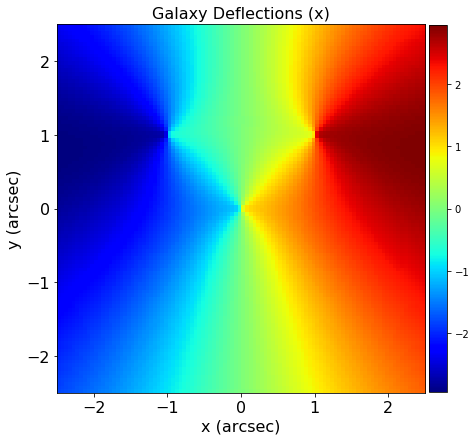

In [10]:
# We can use a galaxy plotter to plot these deflection angles.
# (The deflection angles of different mass-profiles simply add together, just like the 
# light-profiles did before)
galaxy_plotters.plot_deflections_y(galaxy=galaxy_with_3_mass_profiles, grid=image_grids.image)
galaxy_plotters.plot_deflections_x(galaxy=galaxy_with_3_mass_profiles, grid=image_grids.image)

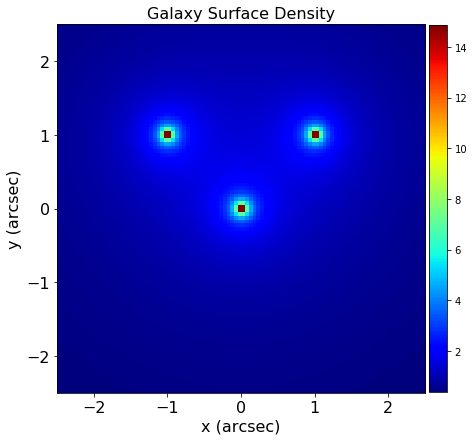

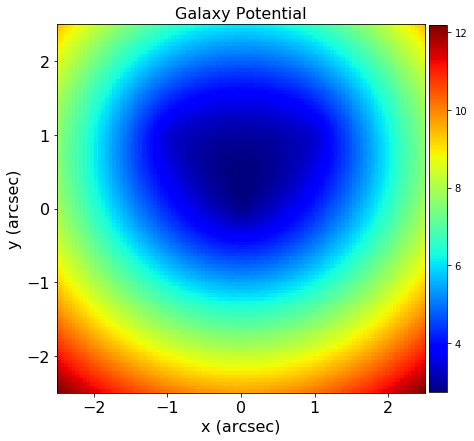

In [11]:
# I wonder what 3 summed surface density maps or potential's look like...
galaxy_plotters.plot_surface_density(galaxy=galaxy_with_3_mass_profiles, grid=image_grids.image)
galaxy_plotters.plot_potential(galaxy=galaxy_with_3_mass_profiles, grid=image_grids.image)

In [12]:
# Finally, it is worth noting that a galaxy can take both light and mass profiles, 
# and we can pass it as many as we desire.
light_profile_1 = light_profiles.SphericalSersic(centre=(0.0, 0.0), intensity=1.0, 
                                                 effective_radius=1.0, sersic_index=1.0)
light_profile_2 = light_profiles.SphericalSersic(centre=(1.0, 1.0), intensity=1.0, 
                                                 effective_radius=2.0, sersic_index=2.0)
light_profile_3 = light_profiles.SphericalSersic(centre=(2.0, 2.0), intensity=1.0, 
                                                 effective_radius=3.0, sersic_index=3.0)
light_profile_4 = light_profiles.EllipticalSersic(centre=(1.0, -1.0), axis_ratio=0.5, phi=45.0, 
                                                  intensity=1.0, effective_radius=1.0, sersic_index=1.0)

mass_profile_1 = mass_profiles.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)
mass_profile_2 = mass_profiles.SphericalIsothermal(centre=(1.0, 1.0), einstein_radius=2.0)
mass_profile_3 = mass_profiles.SphericalIsothermal(centre=(2.0, 2.0), einstein_radius=3.0)
mass_profile_4 = mass_profiles.EllipticalIsothermal(centre=(1.0, -1.0), axis_ratio=0.5, phi=45.0, 
                                                   einstein_radius=2.0)

galaxy_with_many_profiles = galaxy.Galaxy(light_1=light_profile_1, light_2=light_profile_2, 
                                          light_3=light_profile_3, light_4=light_profile_4,
                                           mass_1=mass_profile_1, mass_2=mass_profile_2,
                                           mass_3=mass_profile_3, mass_4=mass_profile_4)

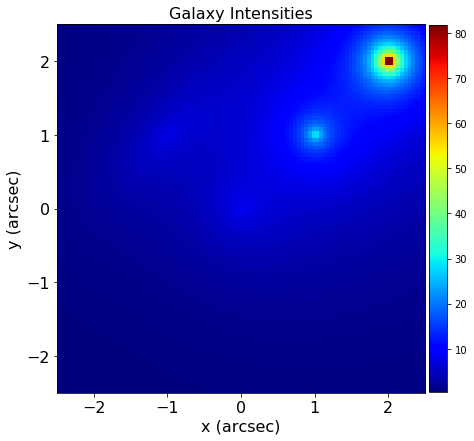

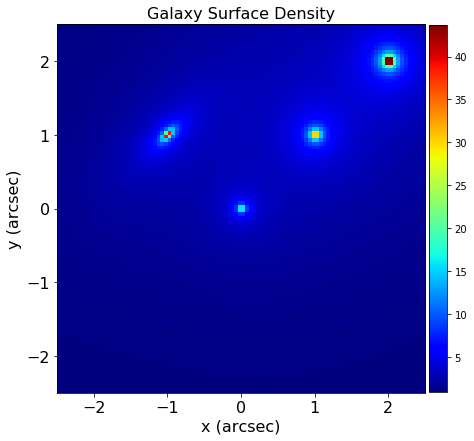

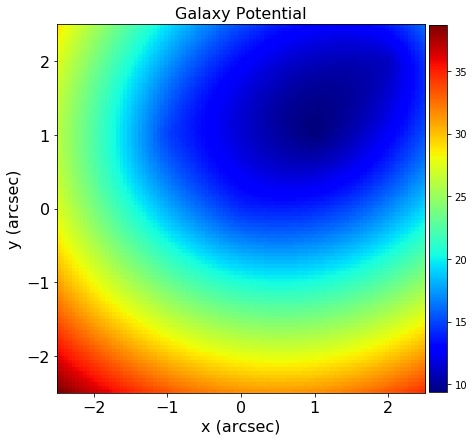

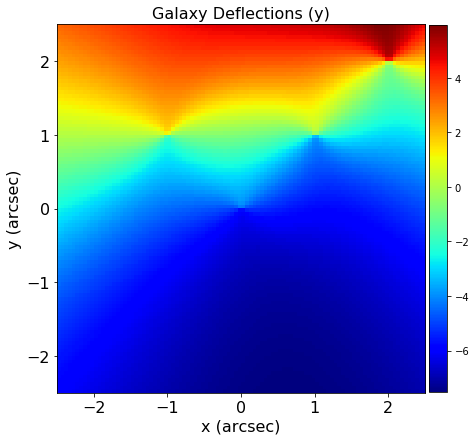

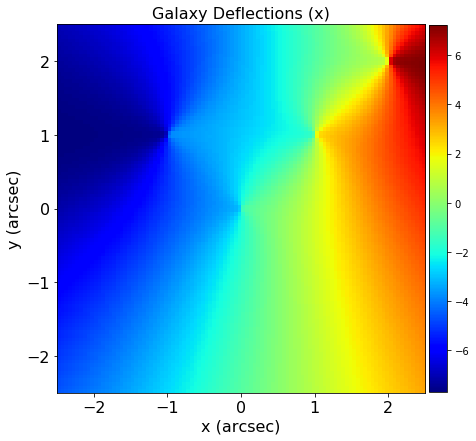

In [13]:
# Suffice to say, the galaxy's images, surface density, potential and deflections look pretty
# interesting.

galaxy_plotters.plot_intensities(galaxy=galaxy_with_many_profiles, grid=image_grids.image)
galaxy_plotters.plot_surface_density(galaxy=galaxy_with_many_profiles, grid=image_grids.image)
galaxy_plotters.plot_potential(galaxy=galaxy_with_many_profiles, grid=image_grids.image)
galaxy_plotters.plot_deflections_y(galaxy=galaxy_with_many_profiles, grid=image_grids.image)
galaxy_plotters.plot_deflections_x(galaxy=galaxy_with_many_profiles, grid=image_grids.image)

In [ ]:
# And we're done. Lets finished by just thinking about one question:

# 1) We've learnt we can group profiles into galaxies, to essentially sum the contribution of each light profile to the
#    galaxy image's intensity, or sum the contribution of each mass profile to the surface density, potential and
#    deflection angles. In strong lensing, there are often multiple galaxies next to one another responsible for the
#    lensing - how might we account for this?